In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading data 
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data =  scaler.transform(data)

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [17]:

scaled_data.shape

(178, 14)

In [18]:
x_pca.shape

(178, 9)

In [10]:
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

In [19]:
# Cumulative variance 

var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85])

In [20]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

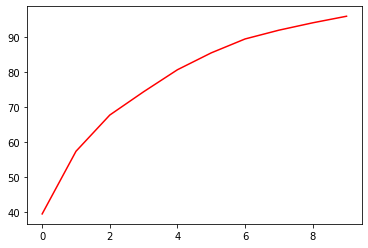

In [21]:
plt.plot(var1,color="red")

In [23]:
x_pca[:,0:6]

array([[-3.5229339 , -1.45309844, -0.16479549, -0.01327282,  0.73734536,
        -0.30071618],
       [-2.52885806,  0.33001925, -2.02670665, -0.41714436, -0.28321373,
        -0.88430941],
       [-2.78502898, -1.03693595,  0.9832377 ,  0.66423241, -0.38756497,
         0.46884161],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304,  0.60775846,  1.12813634,
         0.00529036],
       [ 2.75522166, -2.29378408, -0.55047368, -0.39157042,  1.06708304,
         1.01256231],
       [ 3.49633565, -2.76060799,  1.01315115,  0.3496303 , -1.00513627,
         0.37722337]])

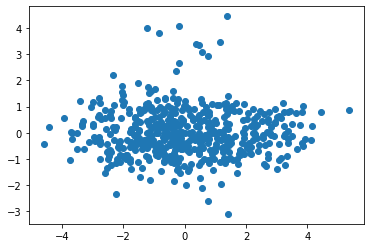

In [24]:
x = x_pca[:,0:3]
y = x_pca[:,3:6]
plt.scatter(x,y)

In [25]:
finalDf = pd.concat([pd.DataFrame(x_pca[:,0:6],columns=['pc1','pc2','pc3','pc4','pc5','pc6']), 
                     data[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,Type
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,1
...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,3
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,3
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,3
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

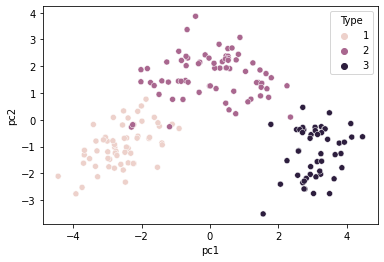

In [26]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')
# visualization of categorical data